## Data Description
The dataset has 21 columns and 10,000 rows, varying from demographic, lifestyle and clinical information related to cardiovascular health. It includes both numerical (float64) and categorical (object) variables.

<u> Variables: </u>
1. **Age**: Patient age in years (numerical)
2. **Gender**: Biological sex ("Male" or "Female")
3. **Blood Pressure**: Systolic blood pressure measurement in mmHg (numerical)
4. **Cholesterol Level**: Total cholesterol measurement in mg/dL (numerical)
5. **Exercise Habits**: Self-reported exercise frequency ("Low", "Medium", "High")
6. **Smoking**: Smoking status at the time ("Yes" or "No")
7. **Family Heart Disease**: Family history of heart disease ("Yes" or "No")
8. **Diabetes**: Diabetes diagnosis ("Yes" or "No")
9. **BMI**: Body Mass Index in kg/m^2 (numerical)
    - Underweight: < 18.5
    - Normal Weight: 18.5 - 24.9
    - Overweight: 25 - 29.9
    - Obese: 30 <=
10. **High Blood Pressure**: Hypertension diagnosis ("Yes" or "No")
11. **Low HDL Cholesterol**: Low "good" cholesterol ("Yes" or "No")
12. **High LDL Cholesterol**: High "bad" cholesterol ("Yes" or "No")
13. **Alcohol Consumption**: Self-reported alcohol intake ("None", "Low", "Medium", "High")
14. **Stress Level**: Perceived stress ("Low", "Medium", "High")
15. **Sleep Hours**: Average hours of sleep at night (numerical)
16. **Sugar Consumption**: Self-reported sugar intake ("Low", "Medium", "High")
17. **Triglyceride Level**: Blood triglyceride measurement in mg/dL (numerical)
18. **Fasting Blood Sugar**: Sugar level after fasting in mg/dL (numerical)
19. **CRP Level**: C-reactive protein levels in mg/dL, showing presence and extent of inflammation in the body (numerical)
    - Normal: < 0.3
20. **Homocysteine Level**: Amino acid linked to heart disease in μmol/L (numerical)
21. **Heart Disease Status**: Presence of heart disease ("Yes" or "No")

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/heart_disease.csv")

# Show dataset dimensions
print(f"Table Dimensions: {df.shape}")

Table Dimensions: (10000, 21)


Number of Missing Values:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64
---


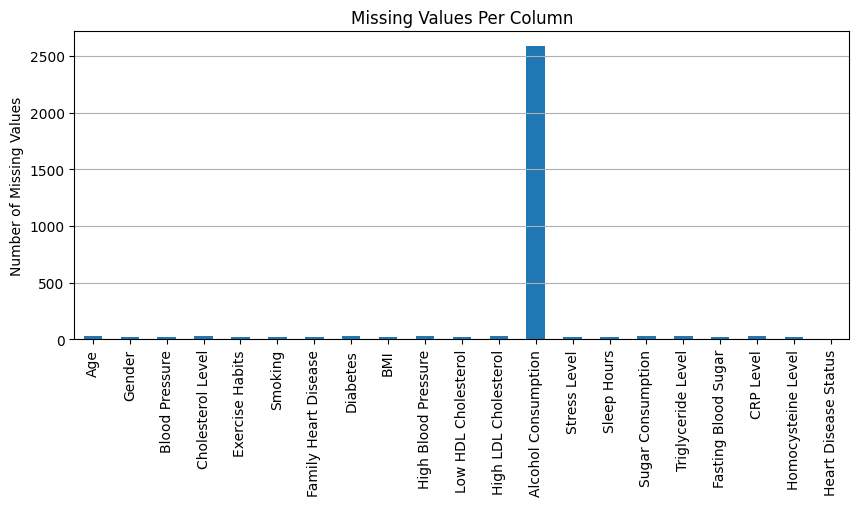

In [3]:
# Check for missing values and how many in each column
missing_values = df.isnull().sum()
print("Number of Missing Values:")
print(missing_values)
print("---")

# Visualize missing data
plt.figure(figsize = (10, 4))
missing_values.plot(kind = "bar")
plt.title("Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.grid(axis = "y")
plt.show()

In [41]:
# Data types for each column and memory usage
print(df.info())
print("---")

# Statistical summary for numerical
print("Numerical Summary:")
print(df.describe())
print("---")

# Statistical summary for categorical
print("Categorical Summary:")
print(df.describe(include = "object"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

---
## Data Visualization

1. Analyzing age distributions, and their relationship to heart disease

C:\Users\marku\AppData\Local\Temp\ipykernel_7036\1852745556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Heart Disease Status", y = "Age", data = df, palette = "Set2")


Text(0.5, 1.0, 'Figure 1: Age vs. Heart Disease')

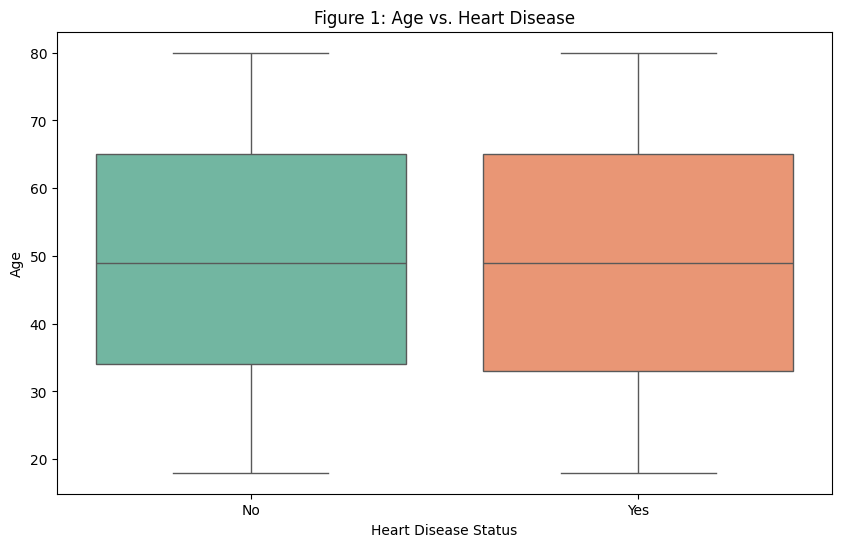

In [76]:
# Age distribution by heart disease status
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Heart Disease Status", y = "Age", data = df, palette = "Set2")
plt.title("Figure 1: Age vs. Heart Disease")

Figure 1 shows that the age distributions for people with and without heart disease are very similar, with a median age of around 49, upper quartile of ~65 and lower quartile of ~34. This means that age alone is not a good indicator for someone who has heart disease. However, the graph also shows that people in their 50s tend to be the most vulnerable to heart issues.

2. Hypertension Analysis

Heart Disease Status    No   Yes
Hypertension                    
False                 1348   341
True                  6652  1659


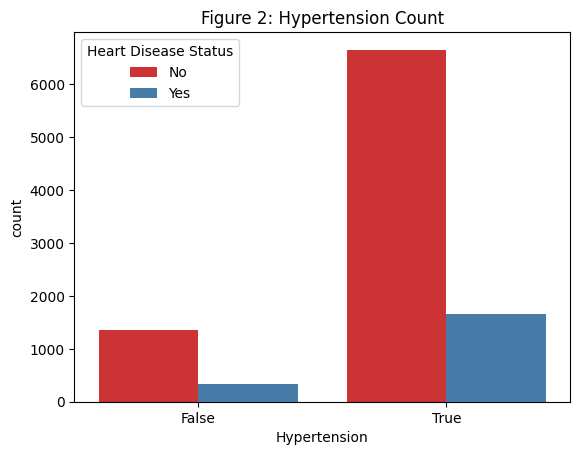

In [78]:
bp_cutoff = 130  # 130+ mmHg is the threshold for hypertension according to American Heart Association
df["Hypertension"] = df["Blood Pressure"] >= bp_cutoff
sns.countplot(x = "Hypertension" , hue = "Heart Disease Status", data = df, palette = "Set1")
plt.title("Figure 2: Hypertension Count")

# Display counts
htn_counts = pd.crosstab(df["Hypertension"], df["Heart Disease Status"])
print(htn_counts)

Statistically, the heart disease rate for people who don't have hypertension is (341 / (341 + 1348)) = 20.2% and the rate for those who do are (1659 / (1659 + 6652)) = 19.96%. Althought the heart disease rate is similar, there are more heart disease cases occuring in the hypertensive group. Figure 2 shows that individuals with hypertension represents majority of cases, showing that blood pressure has a correlation with heart disease.

3. Smoking's relation to heart disease

Text(0.5, 1.0, 'Figure 3: Smoking vs. Heart Disease')

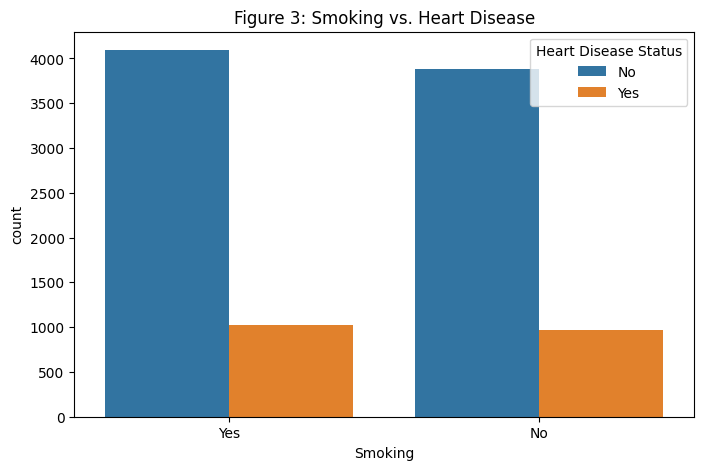

In [66]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "Smoking", hue = "Heart Disease Status", data = df)
plt.title("Figure 3: Smoking vs. Heart Disease")

4. Exercise Habits' connection to heart disease

Text(0.5, 1.0, 'Figure 4: Exercise Habits vs. Heart Disease')

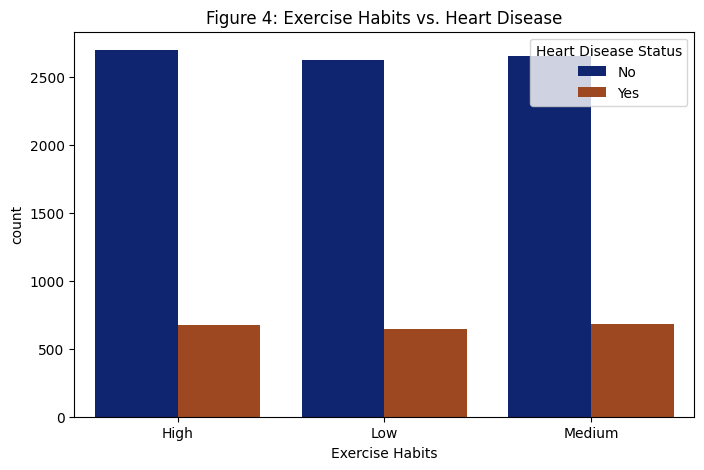

In [80]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "Exercise Habits", hue = "Heart Disease Status", data = df, palette = "dark")
plt.title("Figure 4: Exercise Habits vs. Heart Disease")


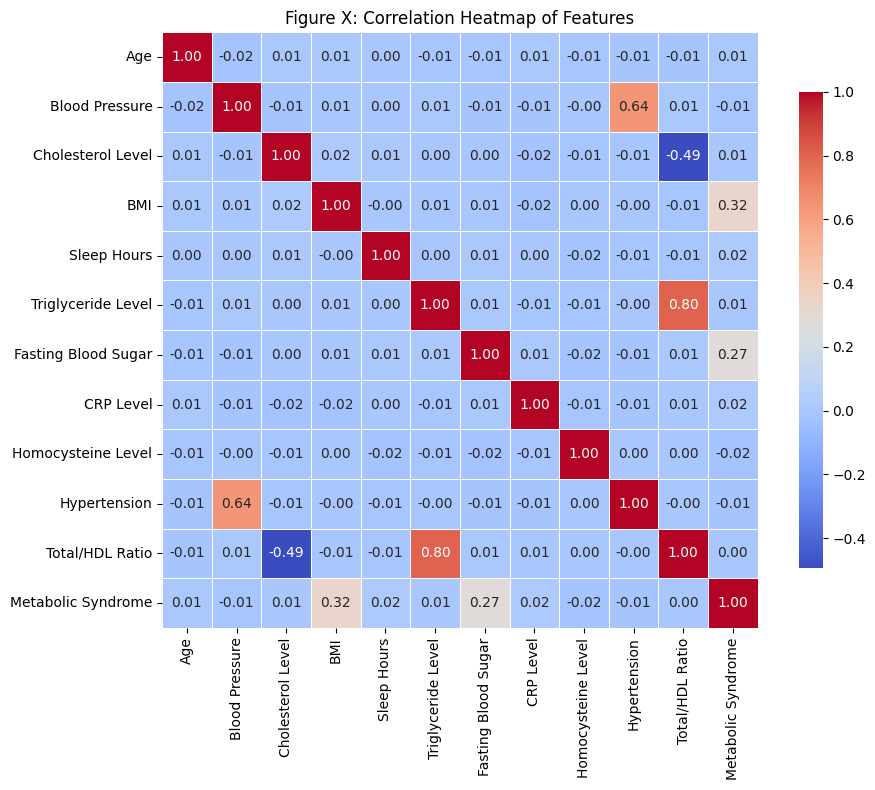

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Compute correlation matrix (only numeric columns)
corr = df.corr(numeric_only=True)

# Create heatmap
sns.heatmap(
    corr,
    annot=True,         # show correlation values
    fmt=".2f",          # format numbers to 2 decimals
    cmap='coolwarm',    # color palette (blue-red)
    square=True,        # square cells
    linewidths=0.5,     # grid lines
    cbar_kws={"shrink": 0.8}  # shrink color bar
)

plt.title("Figure X: Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


Weak correlations are normal with categorical targets